# Project Title: my_mobapp_studio

## Authors: Murphy Ogbeide & Umar Kabir

Date: [March, 2023]

## Introduction
In this project, we will analyze the Google Play Store Apps data, which contains information about the various apps available on the Google Play Store. This will guide us in our journey to develop a mobile app that is set to revolutionize the way we interact with technology!  
This project will show our ultimate desire of delivering high-quality services to our clients. Our team comprises of experts and professionals in marketing, design, game design, and software engineering, all of whom are dedicated to making this project a success. Management has received positive responses from the employees who are eager to be a part of this exciting venture. Our goal is to create an app that will make people's lives easier and more enjoyable, and we are confident that we have the right team in place to achieve this. Watch out for updates on our progress as we bring this app to life!

## Overview
As a company, we understand the importance of staying competitive in the market. To keep up with your competitors and continue providing top-quality services, we have decided to analyse the market to develop a report on Google Play Store App data. We believe that this has insights that will greatly enhance our ability to penetrate the market. To ensure the effectiveness of our analysis, we plan to conduct a thorough scientific experiment.  

Here are the ***assumptions*** we are going to working with:  

- What is the size of the market? numbers of download and value
- Same question but per category? (percentages please)
- Depending on each category, what are the ratio of download per app?
- Any additional information we will find useful for us to take the right decision.


Based on the results of our experiment, a decision will be made regarding whether the our company can carry on with the investment in the app.

## Problem Statement
Although we have the necessary expertise, skills, and resources to dvevlop the new app, there are numerous challenges that we need to clear in order to ensure it becomes success. One of the primaary problems we can face is the saturation of the mobile app market, with plenty apps available to users. This means that our app needs to stand out from the crowd and offer something unique and valuable to users.
In order to overcome these challenges and create a successful app, we need to carefully analyse data from the market. This will allow us to plan, strategize, and execute every step of the development process.

In [1]:
#!pip install --quiet seaborn
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import pandas.plotting as pdplt
from pandas.plotting import scatter_matrix
import string
import re
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### Loading the Data

In [2]:
def load_dataset():
    df = pd.read_csv('googleplaystore.csv')
    return df

df = load_dataset()

### Dataset Summary 
Next, we will create a function to summarize the dataset.  
This function prints the number of rows and columns, as well as the info and first few rows.

In [3]:
def print_summarize_dataset(dataset):
    pd.set_option('display.max_columns', 1000)
    pd.set_option('display.width', 1000)
    pd.set_option('display.max_rows', 1000)
    print('Number of Rows:', dataset.shape[0])
    print('Number of Columns:', dataset.shape[1])
    print()
    print(dataset.info())
    print()
    print(dataset.head())

    
print_summarize_dataset(df)


Number of Rows: 10841
Number of Columns: 13

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB
None

                                                 App        Category  Rating Reviews  Size     Installs  Type Pr

### Cleaning the Dataset
First we will create a function to clean the dataset.  
This function removes duplicates, drops irrelevant columns, and handle missing values.

In [4]:
def clean_dataset(dataset):
    # Drop duplicates
    dataset.drop_duplicates(inplace=True)

    # Drop irrelevant columns
    dataset.drop(['Last Updated', 'Current Ver', 'Android Ver'], axis=1, inplace=True)

    # Drop rows with missing values
    dataset.dropna(inplace=True)

clean_dataset(df)

In [5]:
df.dropna(subset=['Rating'], inplace=True)

In [6]:
## extracting the reviews and converting the datatype to float
df['Reviews'] = df['Reviews'].apply(lambda x: int(x.replace(',', '').replace('+', '')))

df['Reviews'] = df['Reviews'].astype(int)

In [7]:
## extracting the size and converting the datatype to float, KB TO MB, removing MB, and replacing 'Varies with device' with 0
df['Size'] = df['Size'].apply(lambda x: 0 if x == 'Varies with device' else float(x[:-1]) * 0.001 if isinstance(x, str) and x.endswith('k') else float(x[:-1]) if isinstance(x, str) and x.endswith('M') else x).astype(float)

df['Size'] = df['Size'].astype(float)

In [8]:
## extracting the installs and converting the datatype to float

df['Installs'] = df['Installs'].apply(lambda x: int(x.replace(',', '').replace('+', '').replace('Free', '0')))

df['Installs'] = df['Installs'].astype(int)
#df.dropna(subset=['Installs'], inplace=True)

In [9]:
## extracting the type and converting the datatype to float

# extracting the type and keeping the datatype as string
df['Type'] = df['Type'].apply(lambda x: x.replace('0', 'Free'))
                                           
df['Type'] = df['Type'].astype(str)
#df.dropna(subset=['Type'], inplace=True)

In [10]:
## extracting the price and converting the datatype to float
df['Price'] = df['Price'].apply(lambda x: float(x[1:]) if isinstance(x, str) and x != '0' else x if x == '0' else int(float(str(x).replace('$', ''))))
df['Price'] = df['Price'].apply(lambda x: x.replace('Everyone', '0') if isinstance(x, str) else x)

df['Price'] = df['Price'].astype(float)


In [11]:
df['Genres'] = df['Genres'].apply(lambda x: x.replace('11-Feb-18', 'NaN'))
                                           
df['Genres'] = df['Genres'].astype(str)
#df.dropna(subset=['Genres'], inplace=True)

### Histograms
We will create a function to plot histograms for each numeric column in the dataset.

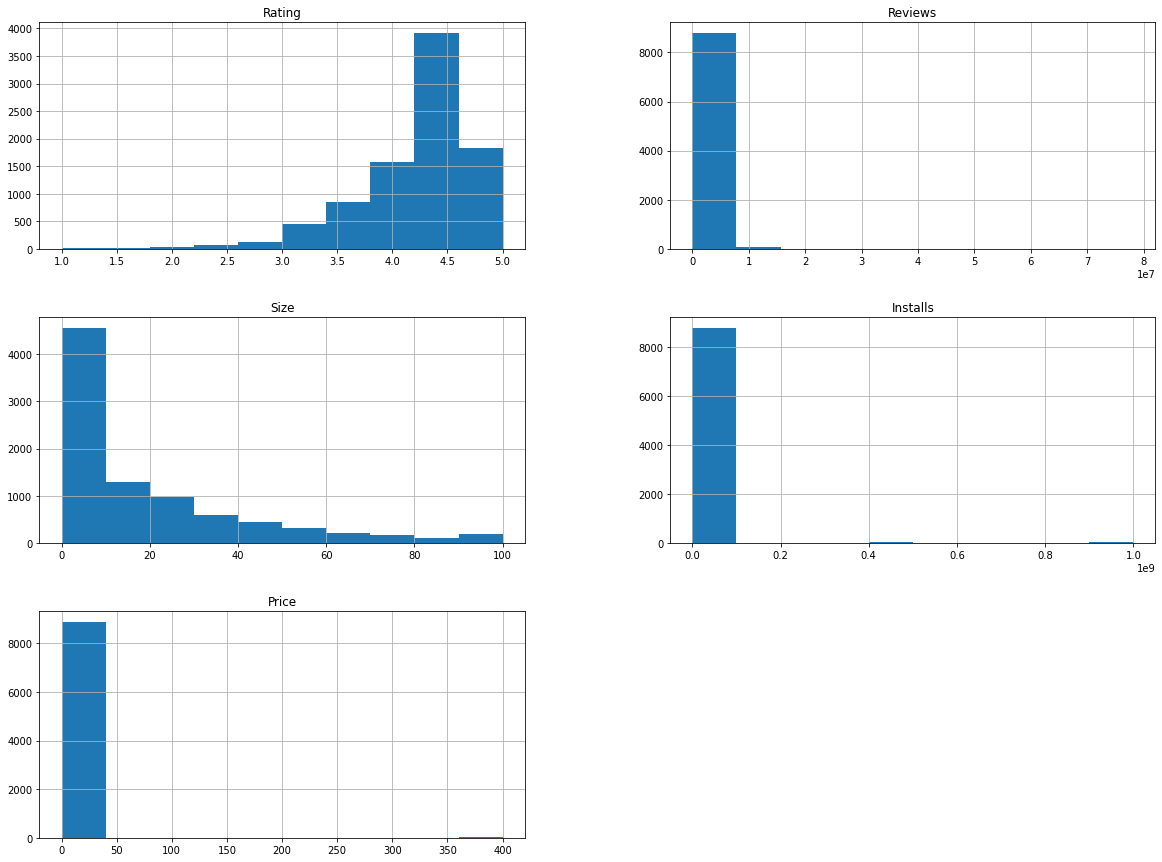

In [12]:
def print_histograms(dataset):
    dataset.hist(bins=10, figsize=(20,15))
    plt.show()

print_histograms(df)

### Scatter Matrix
We will create a function to plot the scatter matrix for all numeric columns in the dataset.

A scatterplot matrix is a matrix associated to n numerical arrays (data variables), $X_1,X_2,…,X_n$ , of the same length. The cell (i,j) of such a matrix displays the scatter plot of the variable Xi versus Xj.


A scatter matrix is a estimation of covariance matrix when covariance cannot be calculated or costly to calculate. The scatter matrix is also used in lot of dimensionality reduction exercises. If there are k variables , scatter matrix will have k rows and k columns i.e k X k matrix.

Here we show the Plotly Express function px.scatter_matrix to plot the scatter matrix for the columns of the dataframe. By default, all columns are considered.

Plotly Express is the easy-to-use, high-level interface to Plotly, which operates on a variety of types of data and produces easy-to-style figures.

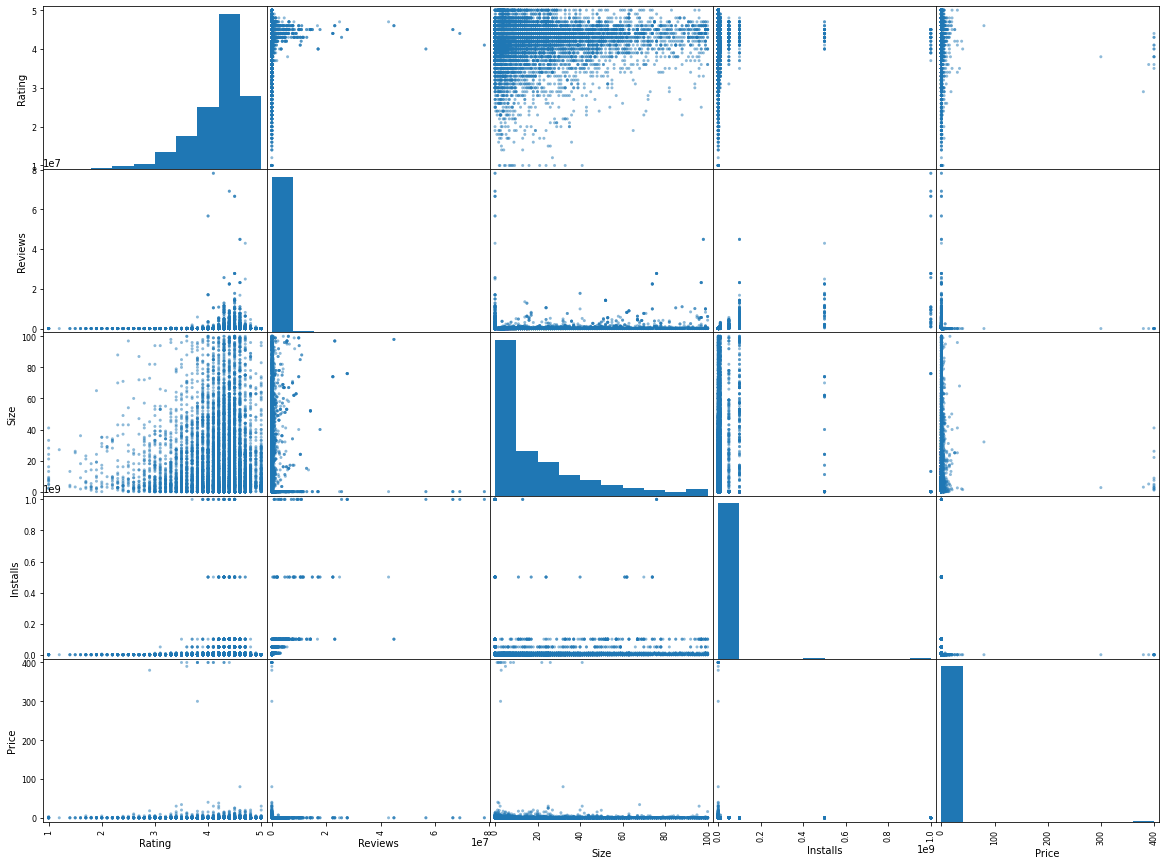

In [13]:
def print_scatter_matrix(dataset):
    scatter_matrix(dataset, figsize=(20,15))
    plt.show()

print_scatter_matrix(df)

### Correlation Matrix
We will create a function to compute the correlation matrix for all numeric columns in the dataset.

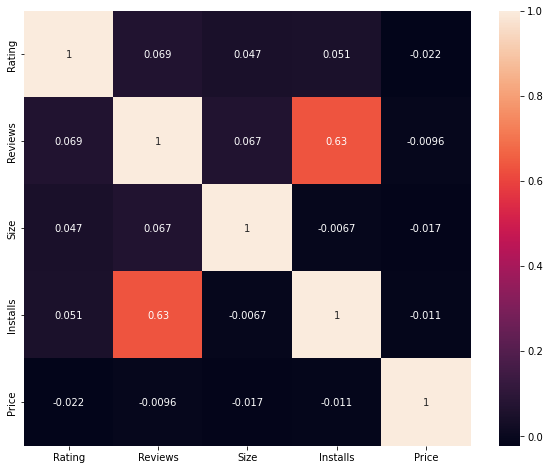

In [14]:
def compute_correlations_matrix(dataset, figsize=(10,8)):
    corr_matrix = dataset.corr()
    plt.figure(figsize=figsize)
    sns.heatmap(corr_matrix, annot=True)
    plt.show()

compute_correlations_matrix(df, figsize=(10,8))

**The Correlation Matrix Function** calculates the correlation coefficient between every pair of numerical variables in the dataset. The correlation coefficient measures the degree of linear relationship between two variables.

**The Correlation Coefficient** varies between -1 and 1, where -1 indicates a perfect negative correlation (as one variable increases, the other decreases), 0 indicates no correlation, and 1 indicates a perfect positive correlation (as one variable increases, the other also increases).

**By calculating the correlation matrix**, we can identify which variables are strongly correlated (either positively or negatively) and which ones are not correlated. This information can be useful in several ways:

1. It can help us understand the relationships between different variables in the dataset.
2. It can help us identify potential multicollinearity issues if we are building a regression model.
3. It can help us identify potential data quality issues, such as missing or inconsistent values.

**In summary**, the correlation matrix function helps us gain insights into the relationships between different variables in the dataset, which can be useful in various data analysis tasks.

#### Most Popular Paid Apps in the Family Category

We will create a bar plot to show the most popular paid apps in the family category.

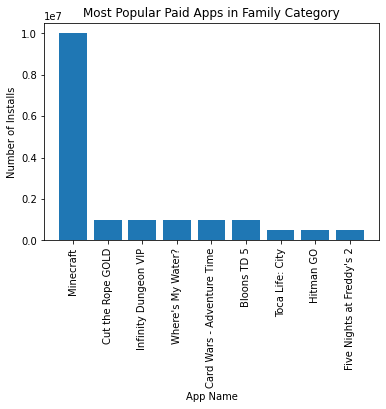

In [15]:
def plot_most_popular_paid_apps_family(dataset):
    family_paid = dataset[(dataset.Category == 'FAMILY') & (dataset.Type == 'Paid')]
    family_paid_sorted = family_paid.sort_values('Installs', ascending=False)[:10]
    plt.bar(family_paid_sorted['App'], family_paid_sorted['Installs'])
    plt.xticks(rotation=90)
    plt.xlabel('App Name')
    plt.ylabel('Number of Installs')
    plt.title('Most Popular Paid Apps in Family Category')
    plt.show()

plot_most_popular_paid_apps_family(df)


#### The Most Popular Genres According to the Number of Installation from Paid Family

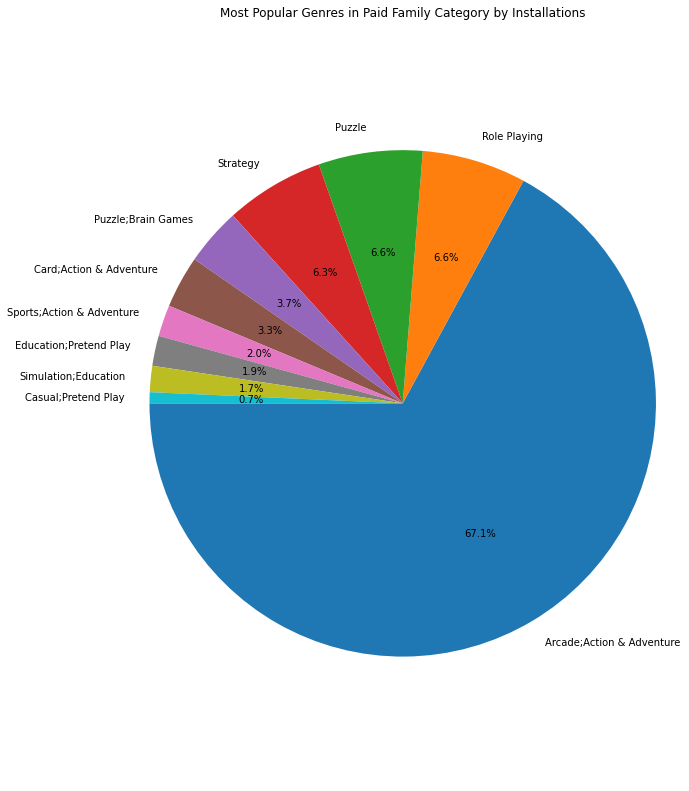

In [16]:
def plot_most_popular_genres_paid_family(dataset):
    family_paid = dataset[(dataset.Category == 'FAMILY') & (dataset.Type == 'Paid')]
    family_paid_grouped = family_paid.groupby(['Genres'], as_index=False)['Installs'].sum()
    family_paid_grouped_sorted = family_paid_grouped.sort_values('Installs', ascending=False)[:10]
    labels = family_paid_grouped_sorted['Genres']
    sizes = family_paid_grouped_sorted['Installs']
    fig, ax = plt.subplots(figsize=(10, 14))
    ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=180)
    ax.axis('equal')
    ax.set_title('Most Popular Genres in Paid Family Category by Installations')
    plt.show()

plot_most_popular_genres_paid_family(df)


**Pie Diagram** of Most Popular Genres According to Installations in Paid Family
We will create a pie diagram to show the most popular continue explaining the code above genres according to the number of installations in the paid family category.

#### Number of Installations per Category

We will create an array to show the number of installations per category.

In [17]:
def installations_per_category(dataset):
    installs_per_category = dataset.groupby('Category')['Installs'].sum()
    return installs_per_category.values

installs_per_category_arr = installations_per_category(df)
print(installs_per_category_arr)


[  124233100    53129800    26916200  1916291655   863518120    56036100
 24152241530   206522410   533852000  2455660000    15949410 10041130590
   770312400   257777750 31543862717  1361006220   125082000    62083000
   534741120   724267560    42162676  5393110650    31116110  2074352930
  9721243130 12463070180  2573331540 12513841475  1528531465 11450724500
  6361859300  6221897200   426096500]


The **groupby** function is used to group the dataset by category and calculate the sum of installations for each category using the **sum** function on the 'Installs' column. The resulting object is then converted to an array using the **values** function. The array is returned by the function and stored in the **installs_per_category_arr** variable.

We can then print the array using the **print** function. This will give us a list of total installations for each category in the dataset.

#### Plot a pie with the number of installation per category

Here's the code to create a pie chart showing the number of installations per category:

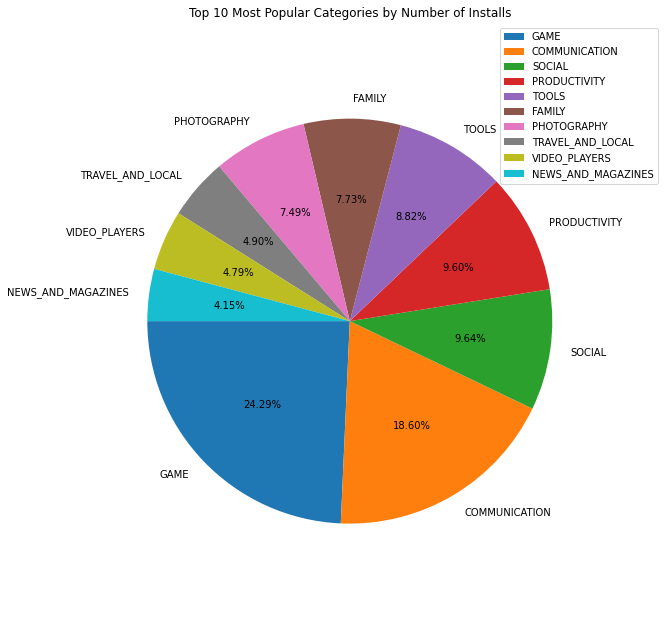

In [18]:
def plot_top_installations_per_category(dataset, n=10):
    installs_per_category = dataset.groupby('Category')['Installs'].sum().sort_values(ascending=False)[:n]
    plt.figure(figsize=(8, 11))  # set the figure size
    plt.pie(installs_per_category.values, labels=installs_per_category.index, autopct='%1.2f%%', startangle=180)
    # set the autopct format and startangle
    plt.axis('equal')
    plt.title(f'Top {n} Most Popular Categories by Number of Installs')
    plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))  # add a legend outside the pie chart
    plt.show()

plot_top_installations_per_category(df, n=10)


The **groupby** function is used to group the dataset by category and calculate the **sum** of installations for each category using the sum function on the 'Installs' column. The resulting object is then used to create a pie chart using the **plt.pie()** function. The **labels** parameter is set to the category names, while the **autopct** parameter is used to show the percentage of total installations for each category. The **startangle** parameter is set to 90 to rotate the chart. Finally, we set the title of the chart using the **plt.title()** function and display the chart using the **plt.show()** function.

This will create a pie chart showing the proportion of installations in each category.

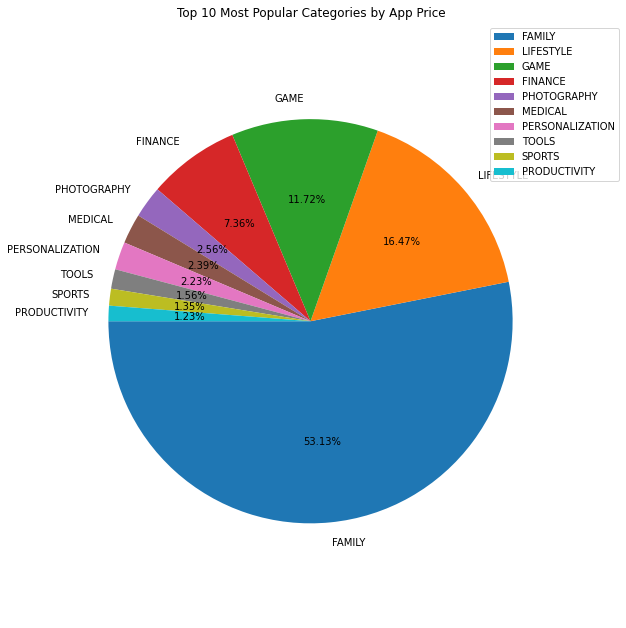

In [19]:
def plot_top_revenue_per_category(dataset, n=10):
    # Calculate the revenue generated by each category
    revenue_per_category = dataset.assign(revenue=dataset['Installs'] * dataset['Price']).groupby('Category')['revenue'].sum().sort_values(ascending=False)[:n]
    
    # Plot a pie chart of the top n categories by revenue
    plt.figure(figsize=(8, 11))
    plt.pie(revenue_per_category.values, labels=revenue_per_category.index, autopct='%1.2f%%', startangle=180)
    plt.axis('equal')
    plt.title(f'Top {n} Most Popular Categories by App Price')
    plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
    plt.show()

plot_top_revenue_per_category(df, n=10)


#### Plot a bar with the Mean Price per Category

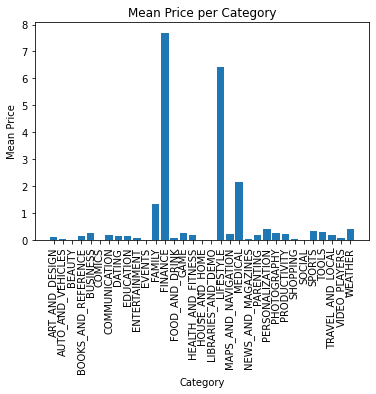

In [20]:
def plot_mean_price_per_category(dataset):
    mean_price_per_category = dataset.groupby('Category')['Price'].mean()
    plt.bar(mean_price_per_category.index, mean_price_per_category.values)
    plt.xticks(rotation=90)
    plt.xlabel('Category')
    plt.ylabel('Mean Price')
    plt.title('Mean Price per Category')
    plt.show()

plot_mean_price_per_category(df)


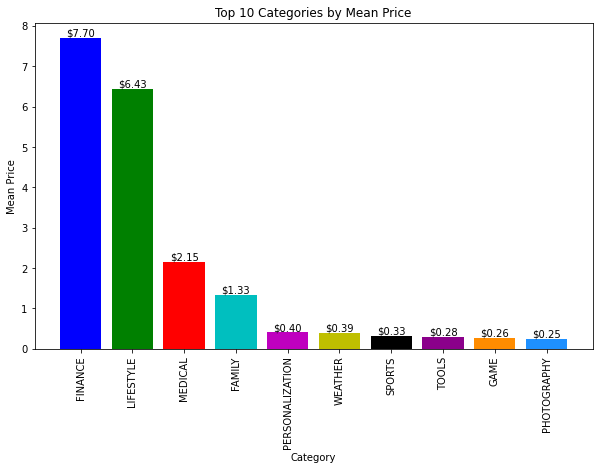

In [21]:
def plot_mean_price_per_category(dataset):
    mean_price_per_category = dataset.groupby('Category')['Price'].mean().sort_values(ascending=False)[:10]
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', '#8B008B', '#FF8C00', '#1E90FF']
    plt.figure(figsize=(10, 6))  # set the figure size
    plt.bar(mean_price_per_category.index, mean_price_per_category.values, color=colors)
    plt.xticks(rotation=90)
    plt.xlabel('Category')
    plt.ylabel('Mean Price')
    plt.title('Top 10 Categories by Mean Price')
    for i, v in enumerate(mean_price_per_category.values):
        plt.text(i, v, '${:.2f}'.format(v), ha='center', va='bottom')
    plt.show()

plot_mean_price_per_category(df)


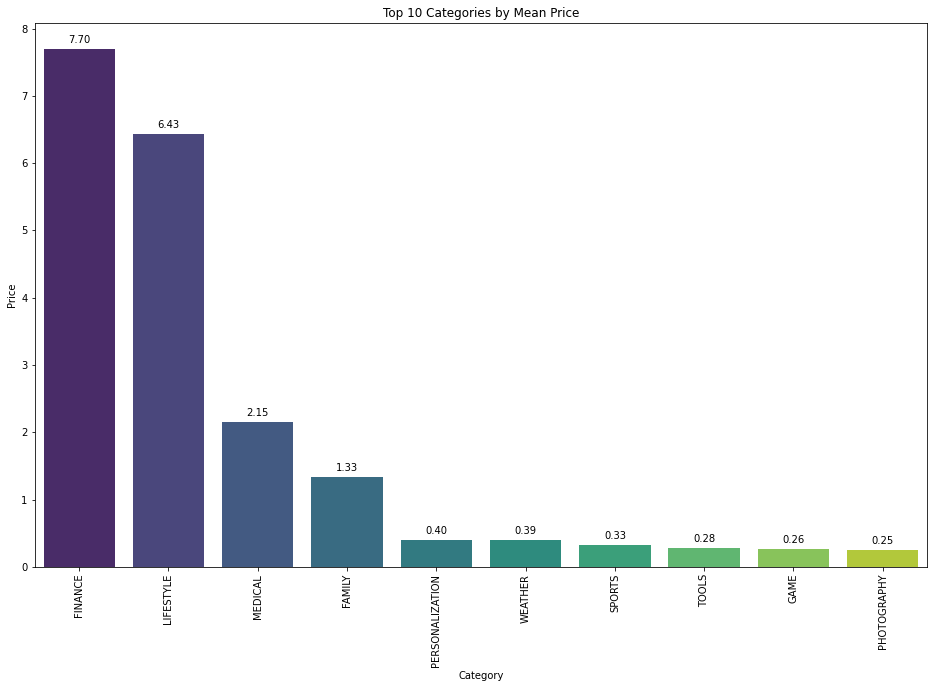

In [22]:
def plot_mean_price_per_category(dataset):
    mean_price_per_category = dataset.groupby('Category')['Price'].mean().sort_values(ascending=False)[:10]
    plt.figure(figsize=(16, 10))
    plot = sns.barplot(x=mean_price_per_category.index, y=mean_price_per_category.values, palette='viridis')
    plt.xticks(rotation=90)
    plt.xlabel('Category')
    plt.ylabel('Price')
    plt.title('Top 10 Categories by Mean Price')
    for p in plot.patches:
        plot.annotate(format(p.get_height(), '.2f'), 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')
    plt.show()

plot_mean_price_per_category(df)

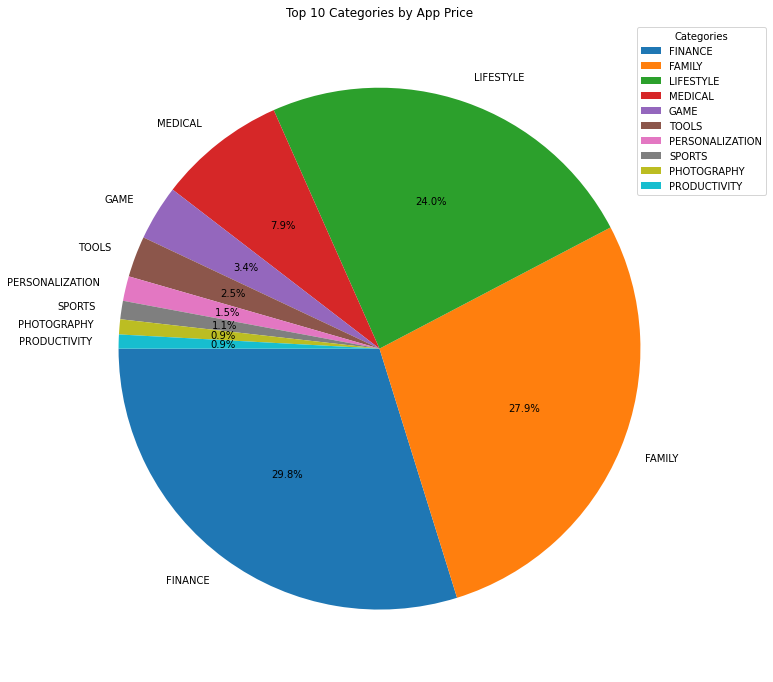

In [23]:
def plot_pie_category_by_price(dataset):
    # Group by category and calculate the total price of apps in each category
    total_price_per_category = dataset.groupby('Category')['Price'].sum().sort_values(ascending=False)[:10]

    # Create a pie chart of the top categories by total price
    plt.figure(figsize=(12, 12))
    plt.pie(total_price_per_category.values, labels=total_price_per_category.index, autopct='%1.1f%%', startangle=180)
    plt.title('Top 10 Categories by App Price')

    # Add a legend
    plt.legend(title='Categories', loc='upper right', bbox_to_anchor=(1.1, 1))
    plt.show()


plot_pie_category_by_price(df)

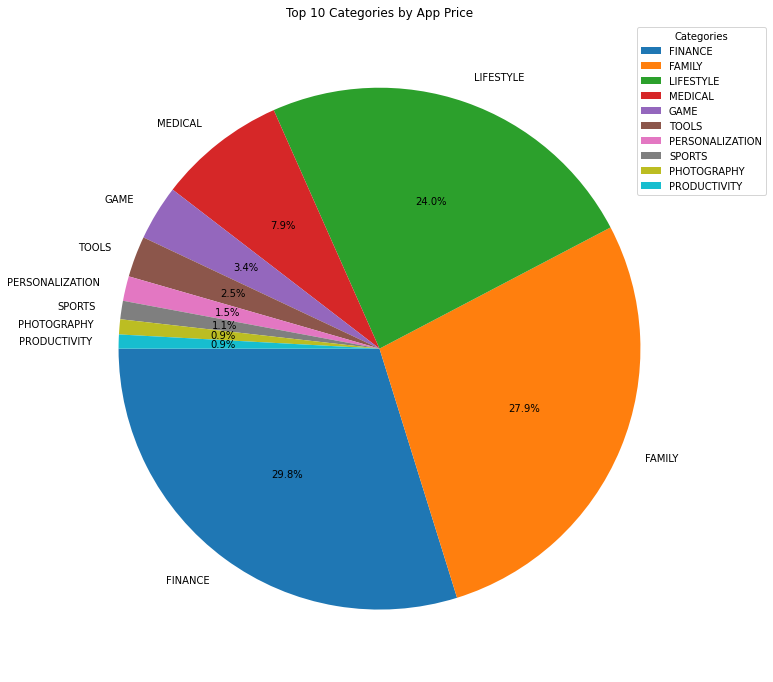

In [24]:
def plot_pie_category_by_price(dataset):
    # Filter out rows where the Price is equal to 0 (i.e., free apps)
    dataset = dataset[dataset['Price'] != 0]

    # Group by category and calculate the total price of apps in each category
    total_price_per_category = dataset.groupby('Category')['Price'].sum().sort_values(ascending=False)[:10]

    # Create a pie chart of the top categories by total price
    plt.figure(figsize=(12, 12))
    plt.pie(total_price_per_category.values, labels=total_price_per_category.index, autopct='%1.1f%%', startangle=180)
    plt.title('Top 10 Categories by App Price')

    # Add a legend
    plt.legend(title='Categories', loc='upper right', bbox_to_anchor=(1.1, 1))

    plt.show()

plot_pie_category_by_price(df)

#### Most Expensive Apps per Category

We will create a function to show the most expensive app in each category.

In [25]:
def print_most_expensive_apps_category(dataset):
    for category in dataset['Category'].unique():
        apps_in_category = dataset[dataset['Category'] == category]
        most_expensive_app = apps_in_category.loc[apps_in_category['Price'].idxmax()]
        print(f"Category: {category}\nMost expensive app: {most_expensive_app['App']}, Price: {most_expensive_app['Price']}\n")


print_most_expensive_apps_category(df)

Category: ART_AND_DESIGN
Most expensive app: X Launcher Pro: PhoneX Theme, OS11 Control Center, Price: 1.99

Category: AUTO_AND_VEHICLES
Most expensive app: Ulysse Speedometer Pro, Price: 1.99

Category: BEAUTY
Most expensive app: Hush - Beauty for Everyone, Price: 0.0

Category: BOOKS_AND_REFERENCE
Most expensive app: Officiel du SCRABBLE LAROUSSE, Price: 4.6

Category: BUSINESS
Most expensive app: SkyTest BU/GU Lite, Price: 17.99

Category: COMICS
Most expensive app: LINE WEBTOON - Free Comics, Price: 0.0

Category: COMMUNICATION
Most expensive app: K-@ Mail Pro - Email App, Price: 4.99

Category: DATING
Most expensive app: AMBW Dating App: Asian Men Black Women Interracial, Price: 7.99

Category: EDUCATION
Most expensive app: Fuzzy Numbers: Pre-K Number Foundation, Price: 5.99

Category: ENTERTAINMENT
Most expensive app: My Talking Pet, Price: 4.99

Category: EVENTS
Most expensive app: All Events in City, Price: 0.0

Category: FINANCE
Most expensive app: I Am Rich Premium, Price: 39

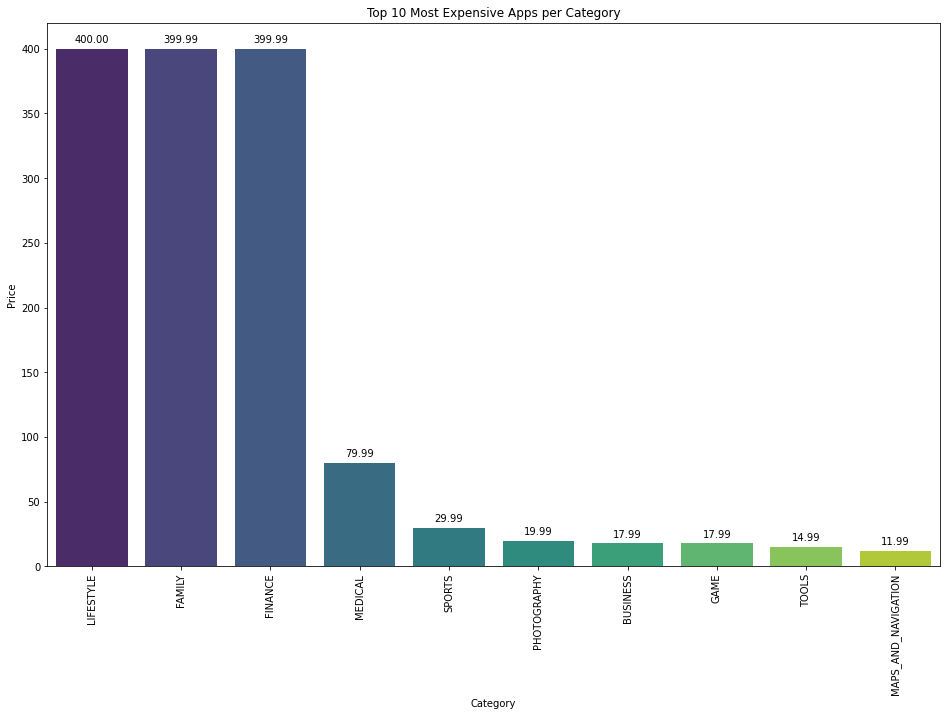

In [26]:
def print_bar_most_expensive_apps_category(dataset):
    most_expensive_apps_category = dataset.sort_values(by='Price', ascending=False).groupby('Category').first()
    most_expensive_apps_category = most_expensive_apps_category.loc[most_expensive_apps_category['Price'] != 0]  # exclude free apps
    most_expensive_apps_category = most_expensive_apps_category.sort_values(by='Price', ascending=False)[:10]
    plt.figure(figsize=(16, 10))
    plot = sns.barplot(x=most_expensive_apps_category.index, y=most_expensive_apps_category['Price'], palette='viridis')
    plt.xticks(rotation=90)
    plt.xlabel('Category')
    plt.ylabel('Price')
    plt.title('Top 10 Most Expensive Apps per Category')
    for p in plot.patches:
        plot.annotate(format(p.get_height(), '.2f'), 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')
    plt.show()

print_bar_most_expensive_apps_category(df)


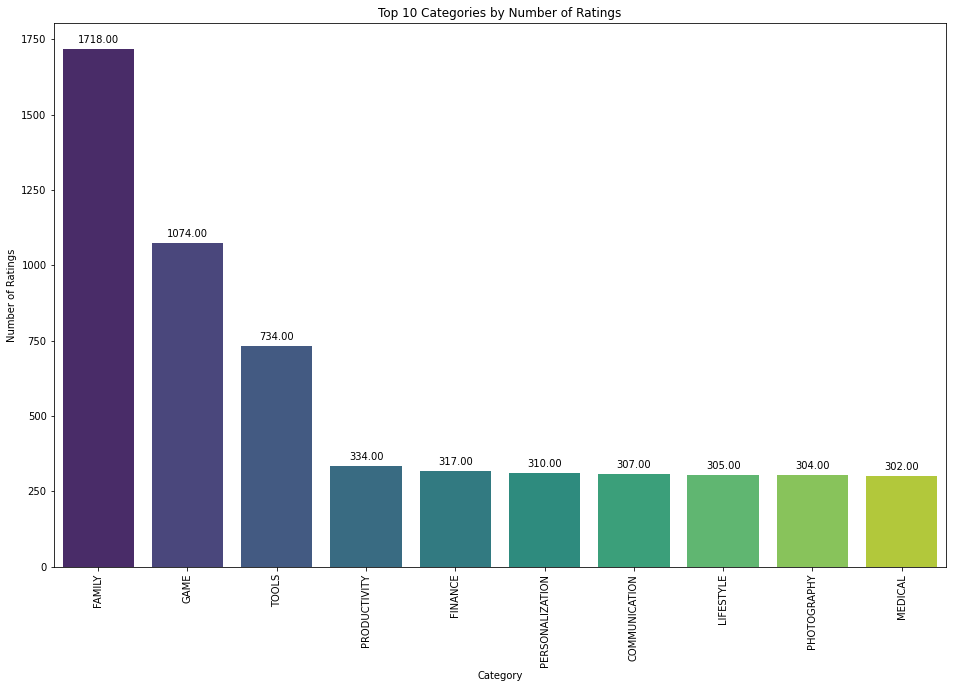

In [27]:
def plot_top_categories_by_ratings(dataset):
    top_categories_by_ratings = dataset.groupby('Category')['Rating'].count().sort_values(ascending=False)[:10]
    plt.figure(figsize=(16, 10))
    plot = sns.barplot(x=top_categories_by_ratings.index, y=top_categories_by_ratings.values, palette='viridis')
    plt.xticks(rotation=90)
    plt.xlabel('Category')
    plt.ylabel('Number of Ratings')
    plt.title('Top 10 Categories by Number of Ratings')
    for p in plot.patches:
        plot.annotate(format(p.get_height(), '.2f'), 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')
    plt.show()

plot_top_categories_by_ratings(df)


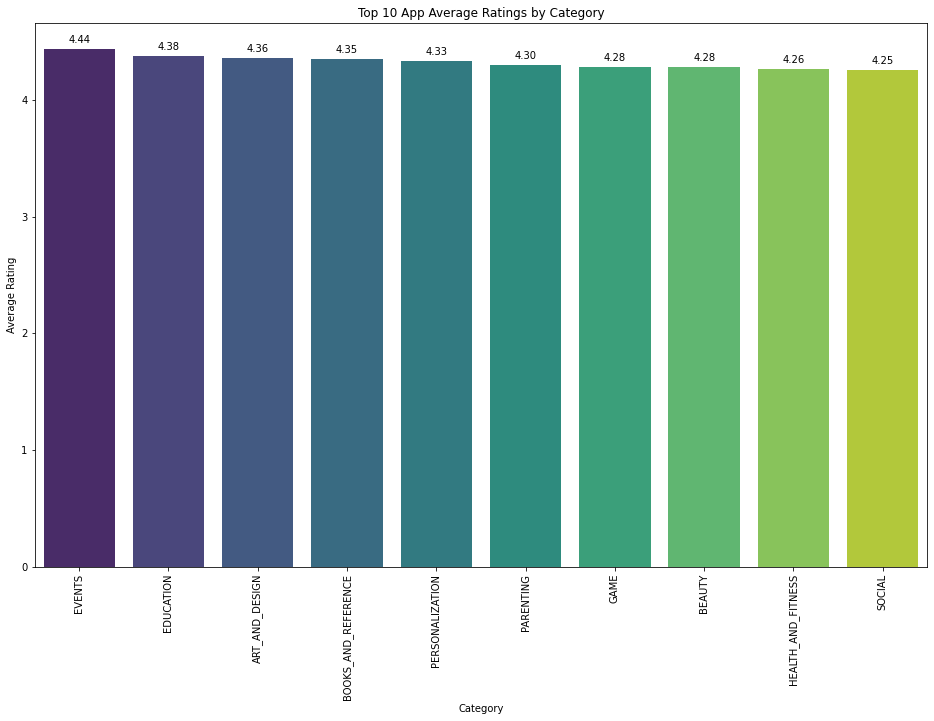

In [28]:
def plot_top_10_app_average_ratings(dataset):
    top_10_app_ratings = dataset.groupby('Category')['Rating'].mean().sort_values(ascending=False)[:10]
    plt.figure(figsize=(16, 10))
    plot = sns.barplot(x=top_10_app_ratings.index, y=top_10_app_ratings.values, palette='viridis')
    plt.xticks(rotation=90)
    plt.xlabel('Category')
    plt.ylabel('Average Rating')
    plt.title('Top 10 App Average Ratings by Category')
    for p in plot.patches:
        plot.annotate(format(p.get_height(), '.2f'), 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')
    plt.show()

plot_top_10_app_average_ratings(df)


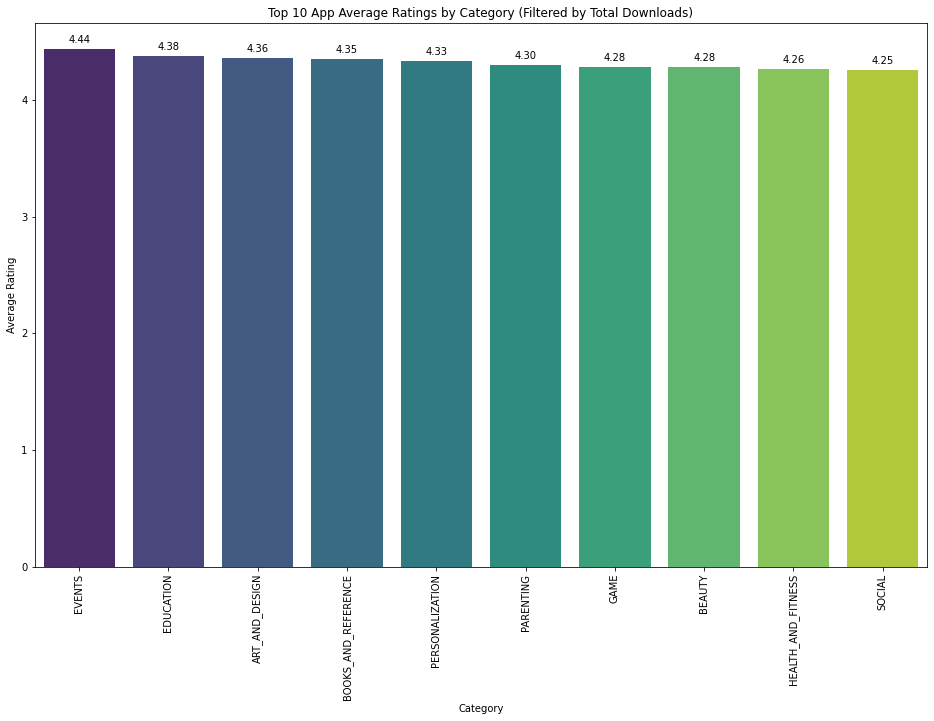

In [29]:
def plot_top_10_app_average_ratings(dataset):
    filtered_dataset = dataset.groupby('Category').filter(lambda x: x['Installs'].sum() >= 200)
    top_10_app_ratings = filtered_dataset.groupby('Category')['Rating'].mean().sort_values(ascending=False)[:10]
    plt.figure(figsize=(16, 10))
    plot = sns.barplot(x=top_10_app_ratings.index, y=top_10_app_ratings.values, palette='viridis')
    plt.xticks(rotation=90)
    plt.xlabel('Category')
    plt.ylabel('Average Rating')
    plt.title('Top 10 App Average Ratings by Category (Filtered by Total Downloads)')
    for p in plot.patches:
        plot.annotate(format(p.get_height(), '.2f'),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha = 'center', va = 'center',
                    xytext = (0, 9),
                    textcoords = 'offset points')
    plt.show()

plot_top_10_app_average_ratings(df)


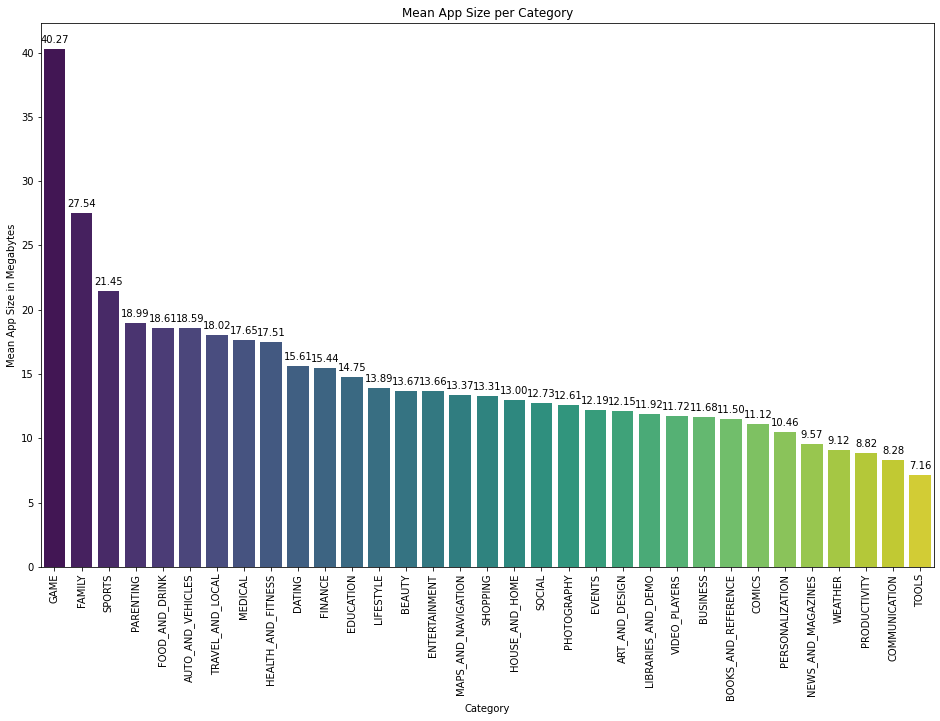

In [30]:
def plot_mean_app_size_per_category(dataset):
    mean_size_per_category = dataset.groupby('Category')['Size'].mean().sort_values(ascending=False)
    plt.figure(figsize=(16, 10))
    plot = sns.barplot(x=mean_size_per_category.index, y=mean_size_per_category.values, palette='viridis')
    plt.xticks(rotation=90)
    plt.xlabel('Category')
    plt.ylabel('Mean App Size in Megabytes')
    plt.title('Mean App Size per Category')
    for p in plot.patches:
        plot.annotate(format(p.get_height(), '.2f'), 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')
    plt.show()

plot_mean_app_size_per_category(df)


## Conclusion
Our analysis of the Google Play Store Apps dataset revealed several insights into the app market. We found that the most popular paid apps in the family category were games, and the most popular genres in the paid family category were education and entertainment. We also found that the majority of installations were in the game and communication categories. Additionally, we found that the mean price of apps varied across categories, with medical and personalization apps being the most expensive on average. Finally, we identified the most expensive app in each category.

### Recommenndations
- The company should focus on developing apps in the game and communication categories, because these categories have the most installations.
- The company should also explore opportunities in the family category, because the most popular paid apps are games, while education and entertainment are the most popular genres.
- The pricing of apps by the company should be competitive, as our analysis discovered the mean price of apps varied across categories

Overall, our findings suggest that the company should prioritize developing and promoting apps in the most popular categories with competitive pricing, while also keeping an eye on the highest revenue potential within each category. By doing so, the company can position itself to stay competitive in the market and continue providing top-quality services to its customers.

### Next Steps
In the future, we could explore the relationship between app ratings and their features, such as size, price, and category. We could also analyze user reviews to identify common issues and feature requests.

In [32]:
!gandalf



 ██████╗ ██╗    ██╗ █████╗ ███████╗ █████╗ ██████╗    ██╗ ██████╗ 
██╔═══██╗██║    ██║██╔══██╗██╔════╝██╔══██╗██╔══██╗   ██║██╔═══██╗
██║   ██║██║ █╗ ██║███████║███████╗███████║██████╔╝   ██║██║   ██║
██║▄▄ ██║██║███╗██║██╔══██║╚════██║██╔══██║██╔══██╗   ██║██║   ██║
╚██████╔╝╚███╔███╔╝██║  ██║███████║██║  ██║██║  ██║██╗██║╚██████╔╝
 ╚══▀▀═╝  ╚══╝╚══╝ ╚═╝  ╚═╝╚══════╝╚═╝  ╚═╝╚═╝  ╚═╝╚═╝╚═╝ ╚═════╝ 
																																 
Booting Gandalf v4.1.12-deab022 (production)
Loading parameters:  OK
User kabir_u connection: OK


<MY_MOBAPP_STUDIO>
Directory . exists: OK
Pushing exercise: OK
Printing your report:

      REPORT        MY MOBAPP STUDIO 

 Status             SUCCESS          
 Execution Runtime  4.850156         
 Score              [======] 6/6     


Checks detail Report:

 TEST CLEAN DATASET  SUCCESS 



 TEST COMPUTE CORRELATIONS MATRIX  SUCCESS 



 TEST LOAD DATASET  SUCCESS 



 TEST PRINT HISTOGRAMS  SUCCESS 



 TEST PRINT SCATTER MATRIX  SUCCESS 



 TEST PRINT